In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import ast
from datetime import datetime
import string
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [149]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

In [35]:
restaurants_df = pd.read_csv('output/responses/cleaned_all_restaurants_dataset.csv')

In [36]:
restaurants_df.shape

(4510, 16)

In [37]:
restaurants = restaurants_df.copy()

In [5]:
reviews_df = pd.read_csv('output/responses/all_reviews_dataset.csv', low_memory=False)

In [6]:
reviews_df.shape

(4148074, 16)

In [7]:
reviews = reviews_df.copy()

In [8]:
reviews.shape

(4148074, 16)

## Drop duplicates

In [9]:
reviews[reviews.duplicated(keep=False)]

,place_id,name,review_id,rating,review_text,published_at,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
836579,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSURWbjRmMXZBRRAB,3,Having stemwd snapper fish head with black bea...,8 months ago,2023-12-29 18:27:00.933321,0,NaN,NaN,NaN,2.0,NaN,False,NaN,NaN
836580,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSUNsa3AzX3pnRRAB,4,Good Zhi char esp tomato noodles and steam fis...,9 months ago,2023-11-29 18:27:00.938167,0,NaN,NaN,NaN,506.0,3801.0,True,NaN,NaN
836581,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSUM1b2F1ZGpnRRAB,5,Very economical. Fish steamboat with about 11 ...,10 months ago,2023-10-29 18:27:00.942938,0,NaN,NaN,NaN,114.0,259.0,True,NaN,NaN
836582,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSURaa1B5Mi13RRAB,1,Nothing special only their service attitude is...,11 months ago,2023-09-29 18:27:00.946329,0,NaN,NaN,NaN,166.0,67.0,True,NaN,NaN
836583,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUNaOThYTlRREAE,5,"Bill $100 for 5 adults, reasonae. Fish soup is...",11 months ago,2023-09-29 18:27:00.949322,0,NaN,NaN,NaN,84.0,42.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942836,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSUMwN3NtRDdnRRAB,3,"The fish head steamnoat soup is delious, with ...",4 years ago,2020-08-29 18:27:04.061687,1,NaN,NaN,NaN,47.0,95.0,True,NaN,NaN
1942837,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUMwN3M3bEVBEAE,4,"Excellent char Kueh teow, yuan Yang horfun, on...",4 years ago,2020-08-29 18:27:04.487137,0,NaN,NaN,NaN,773.0,2217.0,True,NaN,NaN
1942838,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUMwN3ZhaEtBEAE,4,Great addition to Turf City. If you like Fish ...,4 years ago,2020-08-29 18:27:04.491038,0,NaN,NaN,NaN,283.0,1552.0,True,NaN,NaN
1942839,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUNVNy1UeWRBEAE,1,"Seriously if you want a good meal, don t try h...",5 years ago,2019-08-29 18:27:04.494468,0,NaN,NaN,NaN,12.0,11.0,False,NaN,NaN


In [10]:
reviews.drop_duplicates(inplace=True)

In [11]:
reviews.shape

(4148000, 16)

## Check NaN values and drop rows

In [12]:
reviews.isnull().sum()

place_id                                     0
name                                         0
review_id                                    0
rating                                       0
review_text                            1478245
published_at                                 0
published_at_date                            7
review_likes_count                           0
response_from_owner_text               3337590
response_from_owner_ago                3334274
response_from_owner_date               3334275
total_number_of_reviews_by_reviewer     180433
total_number_of_photos_by_reviewer     1305320
is_local_guide                          175956
review_translated_text                 3938819
response_from_owner_translated_text    4128855
dtype: int64

### Drop rows where review_text is NaN

In [13]:
reviews = reviews.dropna(subset=['review_text', 'published_at_date'])

In [14]:
reviews.shape

(2669755, 16)

In [15]:
reviews.isnull().sum()

place_id                                     0
name                                         0
review_id                                    0
rating                                       0
review_text                                  0
published_at                                 0
published_at_date                            5
review_likes_count                           0
response_from_owner_text               2056564
response_from_owner_ago                2055006
response_from_owner_date               2055007
total_number_of_reviews_by_reviewer       5623
total_number_of_photos_by_reviewer      711273
is_local_guide                            5617
review_translated_text                 2460577
response_from_owner_translated_text    2655052
dtype: int64

In [24]:
reviews = reviews.dropna(subset=['published_at_date'])

### Drop unnecessary columns

In [16]:
reviews = reviews.drop(columns=['review_translated_text', 'response_from_owner_translated_text', 'response_from_owner_ago', 'response_from_owner_date', 'published_at'])

In [17]:
reviews.shape

(2669755, 11)

### Change remaining NaN to empty string or zero

In [18]:
reviews.sample(10)

,place_id,name,review_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
1910101,ChIJg0i3JI8j2jERECzKAFpEydU,La Saigon,ChdDSUhNMG9nS0VJQ0FnSUR4c0xubmxRRRAB,5,Sweet potato cake with right tinge of sweetnes...,2023-08-30 01:16:52.064905,0,Thank you so much ;),4.0,4.0,False
2737220,ChIJqYP4h6kiTIYR7WKqmze-PuA,Salsa Tex-Mex Plano Texas,ChdDSUhNMG9nS0VJQ0FnSUNnN1BLMHd3RRAB,5,Excellent service and very delicious food,2019-08-30 16:39:36.429915,0,NaN,1.0,NaN,False
769602,ChIJNdCjg4cZ2jERSt74lXifcjE,The Malayan Council,ChZDSUhNMG9nS0VJQ0FnSUNONDRPekl3EAE,5,Amazing service from Mimi today! We appreciate...,2024-01-29 13:22:42.728528,0,NaN,7.0,NaN,False
2459825,ChIJCYpAP2DmaC4RshB4KjZqULA,Paris Van Java,ChdDSUhNMG9nS0VJQ0FnSUNpdDkycXh3RRAB,5,The place is cool,2021-08-30 10:07:35.746517,0,NaN,6.0,257.0,True
1701884,ChIJ5yTs-pYZ2jERSba6hp5oQMQ,FoodLine.sg,ChdDSUhNMG9nS0VJQ0FnSURVMFlLSnJRRRAB,5,Good,2019-08-29 20:27:58.817144,0,NaN,7.0,NaN,False
1190347,ChIJJ1mjFgoX2jERg4CKJG6wwt8,旺爐 City Hot Pot @ Sengkang Grand Mall,ChdDSUhNMG9nS0VJQ0FnSUNEb2JTcHFBRRAB,5,Service was great!,2024-03-30 03:02:30.913847,0,NaN,1.0,NaN,False
3912447,ChIJO-dbW5gZ2jERdPfaLw9jEMQ,𝗔𝗪𝗔𝗗𝗛 | Royal Indian Dining & Lounge,ChdDSUhNMG9nS0VJQ0FnSUNwdDl2Ui13RRAB,5,Thanks Rishab for recommending and service. Gr...,2023-08-31 10:19:04.934578,0,NaN,29.0,34.0,True
649315,ChIJ0ZPx-S8Z2jERpKHHjVP4vjE,Eat 3 Bowls @ Bendemeer,ChdDSUhNMG9nS0VJQ0FnSURPNTRiRC1nRRAB,5,Ordered the lu rou fan set and also the beancu...,2022-08-29 12:44:04.171563,0,NaN,528.0,568.0,True
916813,ChIJGXoEwloZ2jERIUSR4jA7ogQ,Ah Lock & Co,ChZDSUhNMG9nS0VJQ0FnSUN4azRiT2ZREAE,5,"Fantastic customer service, good food.",2023-08-29 16:54:34.007565,0,NaN,2.0,NaN,False
1312696,ChIJv6v6SscZ2jERkx2BLngjhyY,Vietsea II - Xom Nhau,ChdDSUhNMG9nS0VJQ0FnSUNaNmU3ajZnRRAB,5,good,2023-09-30 14:19:08.788901,0,NaN,1.0,NaN,False


In [19]:
reviews['is_local_guide'] = reviews['is_local_guide'].fillna(False)  

In [20]:
reviews[['total_number_of_photos_by_reviewer', 'total_number_of_reviews_by_reviewer']] = reviews[['total_number_of_photos_by_reviewer', 'total_number_of_reviews_by_reviewer']].fillna(0)  

In [21]:
reviews['response_from_owner_text'] = reviews['response_from_owner_text'].fillna("")  

In [26]:
reviews.isnull().sum()

place_id                               0
name                                   0
review_id                              0
rating                                 0
review_text                            0
published_at_date                      0
review_likes_count                     0
response_from_owner_text               0
total_number_of_reviews_by_reviewer    0
total_number_of_photos_by_reviewer     0
is_local_guide                         0
dtype: int64

# Establish the Consideration Set

### Only keep restaurants >= 3.7 rating and >= 75 reviews and <= 2000 reviews

In [88]:
restaurants = restaurants[(restaurants['main_rating'] >= 3.7) & (restaurants['reviews'] >= 75) & (restaurants['reviews'] <= 2000)]

### Only keep reviews with published_at date from 1 Jan 2023

In [27]:
type(list(reviews['published_at_date'])[0])

str

In [28]:
# Convert the 'published_at_date' column to datetime and simplify to just date
reviews['published_at_date'] = pd.to_datetime(reviews['published_at_date'])
reviews['published_at_date'] = reviews['published_at_date'].dt.date
print(reviews['published_at_date'])

0          2024-08-15
1          2024-08-08
2          2024-08-08
3          2024-07-29
4          2024-06-29
              ...    
4148069    2016-08-30
4148070    2016-08-30
4148071    2016-08-30
4148072    2016-08-30
4148073    2014-08-30
Name: published_at_date, Length: 2669750, dtype: object


In [29]:
cut_off_date = datetime.strptime("2023-01-01", '%Y-%m-%d').date()

In [30]:
reviews[reviews['published_at_date'] >= cut_off_date]

,place_id,name,review_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
0,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUM3bE9DZ2lRRRAB,5,Delicious delicious delicious! Had the Tom yum...,2024-08-15,0,,453.0,1210.0,True
1,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSURicHQyb2Z3EAE,4,Fairly authentic Pad Thai cooked by a Thai per...,2024-08-08,0,,1381.0,8425.0,True
2,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSURieXYtTGdnRRAB,5,I had the fried kway tiao which cost $6. If ha...,2024-08-08,0,,615.0,2361.0,True
3,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUNiOFlhSzl3RRAB,3,I got the prawn omelette rice here for $6. The...,2024-07-29,0,,29.0,40.0,False
4,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSUN6NnJhZEp3EAE,5,Really tasty Thai place in chinatown! The gree...,2024-06-29,0,,38.0,12.0,False
...,...,...,...,...,...,...,...,...,...,...,...
4147821,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSUMtNUx6NWdBRRAB,4,Parking: Food,2023-08-30,0,,5.0,33.0,True
4147822,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSURlcGREYzFRRRAB,5,A richly flavored collection of classic Singap...,2023-08-30,2,,588.0,5441.0,True
4147823,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChZDSUhNMG9nS0VJQ0FnSURlaXJ5M2R3EAE,4,Vegetarian options: The noddles and the Thai s...,2023-08-30,0,,14.0,0.0,True
4147824,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSUNlNjdmaXh3RRAB,5,"As a vegetarian who loves Chinese street food,...",2023-08-30,2,,31.0,7.0,False


In [31]:
reviews = reviews[reviews['published_at_date'] >= cut_off_date]

In [32]:
reviews.shape

(1348619, 11)

In [33]:
reviews_csv_path = 'output/responses/cleaned_reviews_dataset.csv'
reviews.to_csv(reviews_csv_path, index=False)

## Merge Reviews and Restaurants Dataset

In [93]:
reviews.drop(columns=['name', 'review_id'], inplace=True)

In [94]:
reviews

,place_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
0,ChIJe3o1EBQZ2jERzAmaXpqhpAM,5,Delicious delicious delicious! Had the Tom yum...,2024-08-15,0,,453.0,1210.0,True
1,ChIJe3o1EBQZ2jERzAmaXpqhpAM,4,Fairly authentic Pad Thai cooked by a Thai per...,2024-08-08,0,,1381.0,8425.0,True
2,ChIJe3o1EBQZ2jERzAmaXpqhpAM,5,I had the fried kway tiao which cost $6. If ha...,2024-08-08,0,,615.0,2361.0,True
3,ChIJe3o1EBQZ2jERzAmaXpqhpAM,3,I got the prawn omelette rice here for $6. The...,2024-07-29,0,,29.0,40.0,False
4,ChIJe3o1EBQZ2jERzAmaXpqhpAM,5,Really tasty Thai place in chinatown! The gree...,2024-06-29,0,,38.0,12.0,False
...,...,...,...,...,...,...,...,...,...
4147821,ChIJ5TMoXCMY2jERzpazbjQOs6M,4,Parking: Food,2023-08-30,0,,5.0,33.0,True
4147822,ChIJ5TMoXCMY2jERzpazbjQOs6M,5,A richly flavored collection of classic Singap...,2023-08-30,2,,588.0,5441.0,True
4147823,ChIJ5TMoXCMY2jERzpazbjQOs6M,4,Vegetarian options: The noddles and the Thai s...,2023-08-30,0,,14.0,0.0,True
4147824,ChIJ5TMoXCMY2jERzpazbjQOs6M,5,"As a vegetarian who loves Chinese street food,...",2023-08-30,2,,31.0,7.0,False


In [95]:
# inner merge
restaurants_and_reviews = restaurants.merge(reviews, how='inner', on='place_id')

In [97]:
reviews.shape

(1348619, 9)

In [96]:
restaurants_and_reviews.shape

(899775, 25)

In [101]:
restaurants_and_reviews.head(10)

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos,coordinates,...,region,cuisine,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
0,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,Food is Wow,2024-08-28,0,,461.0,21.0,True
1,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,4,I always stay at the Grand Copthorne Waterfron...,2024-08-23,0,,333.0,792.0,True
2,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,My family and I had a gathering at Red House S...,2024-08-16,0,,5.0,0.0,False
3,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,Celebrated my MIL 70th birthday and pre-coordi...,2024-08-16,0,,3.0,14.0,False
4,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,Had a wonderful dinner here tonight. The highl...,2024-07-30,0,,714.0,2924.0,True
5,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,"the food, the service, the place are everythin...",2024-07-30,0,,23.0,19.0,True
6,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,Great food,2024-07-30,0,,36.0,0.0,False
7,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,Very good chili crab,2024-06-30,0,,78.0,0.0,False
8,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,"Got the singapore chilli crab, drunken prawns ...",2024-06-30,0,,10.0,11.0,True
9,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian resta

In [111]:
restaurants_and_reviews.duplicated().sum()

157296

In [125]:
restaurants_and_reviews[restaurants_and_reviews.duplicated(keep=False)].sort_values(by='review_text').filter(items=['name', 'address', 'review_text']).head(30)

,name,address,review_text
553168,We Desi - Indian Bistro,371 Beach Road 01-02 City Gate Mall Kampong Gl...,!! Nicely spiced food and good place to chill!
553357,We Desi - Indian Bistro,371 Beach Road 01-02 City Gate Mall Kampong Gl...,!! Nicely spiced food and good place to chill!
553546,We Desi - Indian Bistro,371 Beach Road 01-02 City Gate Mall Kampong Gl...,!! Nicely spiced food and good place to chill!
665612,Labula Mala Xiang Guo (Tampines West),"822 Tampines Street 81, Singapore 520822",!!!! Dietary restrictions: Able to choose your...
664962,Labula Mala Xiang Guo (Tampines West),"822 Tampines Street 81, Singapore 520822",!!!! Dietary restrictions: Able to choose your...
109612,Happy Lamb Hot Pot 快乐小羊火锅 - Orchard,"9 Scotts Rd, #02-10 Pacific Plaza, Singapore 2...",# Singapore Food # Singapore Hot Pot # Happy L...
108298,Happy Lamb Hot Pot 快乐小羊火锅 - Orchard,"9 Scotts Rd, #02-10 Pacific Plaza, Singapore 2...",# Singapore Food # Singapore Hot Pot # Happy L...
110939,Happy Lamb Hot Pot 快乐小羊火锅 - Orchard,"9 Scotts Rd, #02-10 Pacific Plaza, Singapore 2...",# Singapore Food # Singapore Hot Pot # Happy L...
106971,Happy Lamb Hot Pot 快乐小羊火锅 - Orchard,"9 Scotts Rd, #02-10 Pacific Plaza, Singapore 2...",# Singapore Food # Singapore Hot Pot # Happy L...
485898,Miss Saigon Singapore - Orchard Plaza,"150 Orchard Rd, #02-56, Singapore 238841",#1 on the menu is my favourite banh mi! Portio...


In [126]:
restaurants_and_reviews.drop_duplicates(inplace=True)

In [127]:
restaurants_and_reviews[restaurants_and_reviews.duplicated(keep=False)].sort_values(by='review_text').filter(items=['name', 'address', 'review_text']).head(30)

,name,address,review_text


In [128]:
restaurants_and_reviews.shape

(742479, 25)

### Pre-Processing

### Use label encoding for main_category

In [130]:
label_encoder = LabelEncoder()

In [131]:
restaurants_and_reviews['main_category_encoded'] = label_encoder.fit_transform(restaurants_and_reviews['main_category'])

In [132]:
restaurants_and_reviews.review_text[230]

'The New Year decoration is very beautiful and the atmosphere is great. I will go there again to check in. The food is also very good and the service is very good'

### Embed the review_text

#### Text preprocessing

In [133]:
# Convert to lowercase
restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].str.lower()

In [134]:
# Remove numbers
text = "i do not recommend this restaurant, we waited for so long, like 30 minutes, this is ridiculous"
''.join(char for char in text if not char.isdigit())

'i do not recommend this restaurant, we waited for so long, like  minutes, this is ridiculous'

In [135]:
restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].apply(lambda x: ''.join(char for char in x if not char.isdigit()))

In [136]:
restaurants_and_reviews['review_text'][restaurants_and_reviews['review_text'].str.contains('minutes')]

28         i visited singapore with high expectations of ...
133        disappointing experience dining here on a publ...
156        i waited  minutes for my $++ fish and $++ beef...
246        extremely poor service from the wait staff. or...
307        if you order a course, everything will be on y...
                                 ...                        
1585673    it seems like our visit coincided with the nat...
1585748    the food is okay. super disappointed by the di...
1586134    i m not one to give google reviews, but my rec...
1586181    booked with  klook crab vouchers, and called i...
1586221    a very poor restaurant, the food is undercooke...
Name: review_text, Length: 11795, dtype: object

In [137]:
# Remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].apply(remove_punctuation)

In [138]:
restaurants_and_reviews['review_text'][1586221]

'a very poor restaurant the food is undercooked and it took  minutes to get the same dish out'

In [139]:
# Strip trailing spaces
restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].str.strip()

#### Tokenization

In [145]:
# Tokenize
restaurants_and_reviews['review_text_tokens'] = restaurants_and_reviews['review_text'].apply(lambda x: word_tokenize(x))

In [146]:
restaurants_and_reviews['review_text_tokens']

0                                            [food, is, wow]
1          [i, always, stay, at, the, grand, copthorne, w...
2          [my, family, and, i, had, a, gathering, at, re...
3          [celebrated, my, mil, th, birthday, and, preco...
4          [had, a, wonderful, dinner, here, tonight, the...
                                 ...                        
1586307    [having, early, cny, dinner, with, parents, di...
1586308    [among, the, zhichar, restaurants, so, far, th...
1586309                         [nice, and, delicious, food]
1586310    [apr, having, late, dinner, here, my, wife, or...
1586311                        [authentic, and, tasty, food]
Name: review_text_tokens, Length: 1586312, dtype: object

In [148]:
# Remove stop words
stop_words = set(stopwords.words('english'))
restaurants_and_reviews['review_text_tokens'] = restaurants_and_reviews['review_text_tokens'].apply(lambda x: [w for w in x if not w in stop_words]) 

In [149]:
restaurants_and_reviews['review_text_tokens']

0                                                [food, wow]
1          [always, stay, grand, copthorne, waterfront, h...
2          [family, gathering, red, house, seafood, absol...
3          [celebrated, mil, th, birthday, precoordinated...
4          [wonderful, dinner, tonight, highlight, crabs,...
                                 ...                        
1586307    [early, cny, dinner, parents, dishes, tasty, w...
1586308    [among, zhichar, restaurants, far, best, bt, b...
1586309                              [nice, delicious, food]
1586310    [apr, late, dinner, wife, ordered, white, mee,...
1586311                             [authentic, tasty, food]
Name: review_text_tokens, Length: 1586312, dtype: object

In [150]:
# Lemmatize
lemmatizer = WordNetLemmatizer()

In [155]:
sentence = ['wow', 'love', 'this', 'wonderful', 'great', 'food', 'loving', 'eating']

In [157]:
restaurants_and_reviews['review_text_tokens'] = restaurants_and_reviews['review_text_tokens'].apply(lambda x: [lemmatizer.lemmatize(word, pos = "v") for word in x]) 

In [158]:
restaurants_and_reviews['review_text_tokens']

0                                                [food, wow]
1          [always, stay, grand, copthorne, waterfront, h...
2          [family, gather, red, house, seafood, absolute...
3          [celebrate, mil, th, birthday, precoordinated,...
4          [wonderful, dinner, tonight, highlight, crab, ...
                                 ...                        
1586307    [early, cny, dinner, parent, dish, tasty, wort...
1586308    [among, zhichar, restaurants, far, best, bt, b...
1586309                              [nice, delicious, food]
1586310    [apr, late, dinner, wife, order, white, mee, h...
1586311                             [authentic, tasty, food]
Name: review_text_tokens, Length: 1586312, dtype: object

In [166]:
restaurants_and_reviews['review_text_processed'] = [simple_preprocess(review) for review in restaurants_and_reviews['review_text']]

In [169]:
restaurants_and_reviews.sample(5)

,place_id,name,main_category,categories,review_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,main_category_encoded,review_text_tokens,review_text_processed
903160,ChIJfRzW9IYZ2jERvt7JBF5ZK30,Mrs Pho Kitchen - 313@somerset,Vietnamese restaurant,[Vietnamese restaurant],ChZDSUhNMG9nS0VJQ0FnSURoa05QVkVREAE,1,sometimes portions shrink but this beverage wa...,2023-08-31,0,"Hi cindy nguyen, we apologise for the bad expe...",5.0,0.0,False,205,"[sometimes, portion, shrink, beverage, ice, li...","[sometimes, portions, shrink, beverage, ice, l..."
1011243,ChIJL3o0W28Z2jER9pTB9W_H3xY,Wu Wang Guo 勿忘锅 Hot Pot,Hot pot restaurant,[Hot pot restaurant],ChZDSUhNMG9nS0VJQ0FnSURScmR1U1Z3EAE,5,lovely experience,2023-08-31,0,"Dear WeiJean, we are happy to hear that you ha...",4.0,1.0,False,102,"[lovely, experience]","[lovely, experience]"
1525628,ChIJZcsqCqUZ2jERjzIk4OO0wWI,Entre-Nous Creperie,Creperie,[Creperie],ChZDSUhNMG9nS0VJQ0FnSURoX3FqdFJnEAE,5,excellent food and service with geraldine,2023-08-29,0,,7.0,0.0,False,61,"[excellent, food, service, geraldine]","[excellent, food, service, geraldine]"
156341,ChIJXU9FcvQZ2jER7JzFxTOvf9A,Shang Palace,Cantonese restaurant,"[Cantonese restaurant, Chinese restaurant, Chi...",ChZDSUhNMG9nS0VJQ0FnSUNsbGIzQ2R3EAE,5,we had a wonderful dim sum lunch at the restau...,2023-11-30,0,Dear Björn Thank you for taking the time to sh...,193.0,4289.0,True,33,"[wonderful, dim, sum, lunch, restaurant, dim, ...","[wonderful, dim, sum, lunch, restaurant, dim, ..."
1050103,ChIJP33MO-8Z2jER-m-yfORIuf8,Zorba The Greek Taverna,Greek restaurant,[Greek restaurant],ChZDSUhNMG9nS0VJQ0FnSUN4aHNDUFdnEAE,5,came here purely because of the amex cashback ...,2023-08-31,0,"Thank you for your kind review, Jan Berge! Wer...",123.0,121.0,True,92,"[come, purely, amex, cashback, offer, end, eat...","[came, purely, amex, cashback, offer, ended, e..."


In [168]:
# Remove stop words
stop_words = set(stopwords.words('english'))
restaurants_and_reviews['review_text_processed'] = restaurants_and_reviews['review_text_processed'].apply(lambda x: [w for w in x if not w in stop_words]) 

In [171]:
# Lemmatize
lemmatizer = WordNetLemmatizer()
restaurants_and_reviews['review_text_processed'] = restaurants_and_reviews['review_text_processed'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

In [172]:
word2vec = Word2Vec(sentences=restaurants_and_reviews['review_text_processed'])
wv = word2vec.wv

In [181]:
restaurants_and_reviews['review_text_vectors'] = wv

In [187]:
restaurants_and_reviews['review_text_vectors']

0          [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
1          [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
2          [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
3          [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
4          [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
                                 ...                        
1586307    [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
1586308    [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
1586309    [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
1586310    [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
1586311    [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
Name: review_text_vectors, Length: 1586312, dtype: object

In [179]:
wv['steak']

array([ 2.164376  ,  2.3347185 , -2.0586803 , -2.0574794 , -0.772373  ,
       -1.7075164 ,  0.30882537,  1.2983062 , -3.630747  ,  1.4288776 ,
       -2.6465995 , -1.7744397 ,  1.2212545 , -0.5211882 ,  3.016572  ,
       -0.9610462 ,  0.72465175, -2.1562138 , -0.7156798 , -1.6455499 ,
       -3.9184341 , -0.12817954, -0.0246411 ,  1.4733839 ,  0.8497287 ,
       -0.98586476, -1.2869965 ,  1.8746326 , -0.1481718 , -1.7702403 ,
        0.60588527, -0.57160246, -1.6296751 , -0.7816095 , -0.28503865,
        1.7937125 , -0.78919643, -0.74977463, -1.2752427 , -0.66378635,
        0.7592697 ,  1.3932475 , -1.4388096 ,  2.0952392 ,  2.7833993 ,
       -0.30692992,  1.4667768 , -0.27431756,  1.3682278 ,  2.5187132 ,
       -1.2118827 ,  0.11792271, -1.3190027 , -0.8880588 ,  0.2301092 ,
       -1.8106706 ,  2.1438594 ,  0.65585226,  0.29619992,  1.9584494 ,
       -0.971527  , -3.7291586 , -1.2755233 ,  0.3246884 , -2.4020677 ,
        2.3133938 ,  3.2312968 , -0.19994901, -2.1538851 , -2.43

In [175]:
wv.most_similar('steak')

[('ribeye', 0.8562368154525757),
 ('striploin', 0.8109017014503479),
 ('picanha', 0.7473804354667664),
 ('tenderloin', 0.7389163374900818),
 ('sirloin', 0.7120798230171204),
 ('tomahawk', 0.7039548754692078),
 ('fiorentina', 0.7016249895095825),
 ('porterhouse', 0.6833150386810303),
 ('rump', 0.6791690587997437),
 ('sanchoku', 0.6763907074928284)]

#### Encode response_from_owner_text

In [222]:
restaurants_and_reviews['response_from_owner'] = restaurants_and_reviews['response_from_owner_text'].apply(lambda x: 1 if len(x)>0 else 0) 

#### Encode is_local_guide

In [225]:
restaurants_and_reviews['is_local_guide'] = restaurants_and_reviews['is_local_guide'].astype(int)

#### Scale total_number_of_reviews_by_reviewer

In [231]:
scaler = StandardScaler()
model=scaler.fit(restaurants_and_reviews[['total_number_of_reviews_by_reviewer']])
restaurants_and_reviews['total_number_of_reviews_by_reviewer']=model.transform(restaurants_and_reviews[['total_number_of_reviews_by_reviewer']])

#### Dataframe for model

In [232]:
training_df = restaurants_and_reviews[['rating', 'main_category_encoded', 'review_likes_count', 
                                       'total_number_of_reviews_by_reviewer', 'is_local_guide', 'response_from_owner']].copy()

In [233]:
training_df.sample(10)

,rating,main_category_encoded,review_likes_count,total_number_of_reviews_by_reviewer,is_local_guide,response_from_owner
506435,4,33,0,0.998931,1,0
272762,5,199,0,-0.313581,0,1
1193312,5,102,0,-0.257062,1,0
830934,4,28,0,-0.288462,1,1
720580,5,14,0,-0.351261,0,0
537061,4,208,0,-0.332421,0,0
1450856,5,49,1,-0.081223,1,0
439525,5,96,0,0.163696,1,1
343405,5,31,0,1.482488,1,0
695877,5,72,0,-0.357541,0,0


## Clustering for Reviews

In [235]:
km = KMeans(n_init='auto', n_clusters=5)
km.fit(training_df)

/Users/spacemunkei/.pyenv/versions/yumspeakenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [236]:
km.cluster_centers_.shape

(5, 6)

In [237]:
km.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

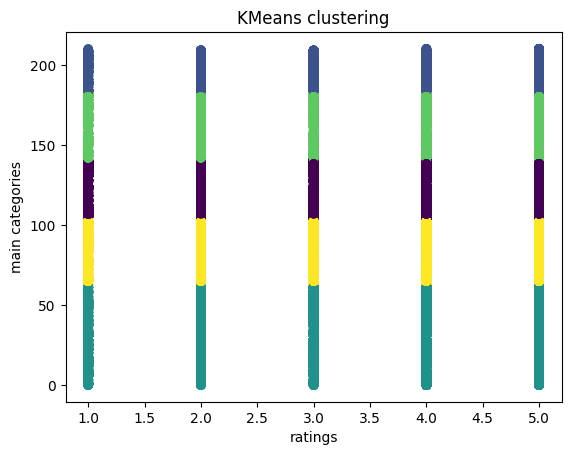

In [239]:
plt.scatter(training_df.iloc[:,0], training_df.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('ratings'); plt.ylabel('main categories');

## Clustering for Restaurants

In [166]:
restaurants_training_df = restaurants[['name', 'reviews', 'cuisine', 'main_rating', 'review_photos']].copy()

In [67]:
label_encoder = LabelEncoder()
restaurants_training_df['cuisine_encoded'] = label_encoder.fit_transform(restaurants_training_df['cuisine'])

In [167]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False)

In [168]:
ohe.fit(restaurants_training_df[['cuisine']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [169]:
ohe.categories_

[array(['African', 'American', 'Asian', 'Australian', 'Bakery', 'Bar',
        'Barbecue', 'Buffet', 'Cafe', 'Casual', 'Catering', 'Chinese',
        'Dessert', 'Eastern European', 'European', 'Event', 'Family',
        'Fast food', 'Fine dining', 'French', 'Fusion', 'German', 'Halal',
        'Health food', 'Indian', 'International', 'Italian', 'Japanese',
        'Korean', 'Latin American', 'Malaysian', 'Mediterranean',
        'Mexican', 'Middle Eastern', 'Modern', 'Seafood', 'Singaporean',
        'Spanish', 'Western'], dtype=object)]

In [170]:
restaurants_training_df[ohe.get_feature_names_out()] = ohe.transform(restaurants_training_df[['cuisine']])

In [171]:
restaurants_training_df.head()

,name,reviews,cuisine,main_rating,review_photos,cuisine_African,cuisine_American,cuisine_Asian,cuisine_Australian,cuisine_Bakery,...,cuisine_Latin American,cuisine_Malaysian,cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Modern,cuisine_Seafood,cuisine_Singaporean,cuisine_Spanish,cuisine_Western
0,Red House Seafood Grand Copthorne,1110,Seafood,4.2,['https://lh5.googleusercontent.com/p/AF1QipNp...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Red House Seafood Nanyang (Clarke Quay),730,Seafood,4.1,['https://lh5.googleusercontent.com/p/AF1QipMe...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Red House Seafood at Esplanade,186,Seafood,4.4,['https://lh5.googleusercontent.com/p/AF1QipOJ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Red Sparrow,496,Asian,4.0,['https://lh5.googleusercontent.com/p/AF1QipO8...,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Rempapa,551,Singaporean,4.2,['https://lh5.googleusercontent.com/p/AF1QipPd...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

In [69]:
restaurants_training_df['review_photos'] = restaurants_training_df['review_photos'].apply(safe_literal_eval)

In [70]:
restaurants_training_df['review_photos'] = restaurants_training_df['review_photos'].apply(lambda x: len(x))

In [71]:
restaurants_training_df

,name,reviews,cuisine,main_rating,review_photos,cuisine_encoded
0,Red House Seafood Grand Copthorne,1110,Seafood,4.2,45,36
1,Red House Seafood Nanyang (Clarke Quay),730,Seafood,4.1,55,36
2,Red House Seafood at Esplanade,186,Seafood,4.4,48,36
3,Red Sparrow,496,Asian,4.0,47,2
4,Red Star Restaurant,3725,Chinese,3.7,49,11
...,...,...,...,...,...,...
4504,Hua Ting Restaurant,721,Chinese,4.1,39,11
4505,Hua Ting Steamboat,70,Asian,4.2,45,2
4506,Hualong Fishhead Steamboat,173,Asian,3.8,28,2
4507,Hualong Fishhead Steamboat,45,Chinese,3.8,53,11


In [148]:
restaurants_training_df.cuisine.nunique()

41

In [53]:
sscaler = StandardScaler()

In [72]:
restaurants_training_df[['reviews_scaled', 'main_rating_scaled', 'review_photos_scaled']] = sscaler.fit_transform(restaurants_training_df[['reviews', 'main_rating', 'review_photos']])

In [157]:
restaurants_training_df

,name,reviews,main_rating,review_photos,cuisine_encoded,reviews_scaled,main_rating_scaled,review_photos_scaled,cluster,cuisine_African,...,cuisine_Malaysian,cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Modern,cuisine_Seafood,cuisine_Singaporean,cuisine_Spanish,cuisine_Street food,cuisine_Western
0,Red House Seafood Grand Copthorne,1110,4.2,45,36,0.387657,-0.308735,0.186900,3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Red House Seafood Nanyang (Clarke Quay),730,4.1,55,36,0.057433,-0.617552,0.626712,3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Red House Seafood at Esplanade,186,4.4,48,36,-0.415310,0.308897,0.318843,3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Red Sparrow,496,4.0,47,2,-0.145916,-0.926368,0.274862,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Red Star Restaurant,3725,3.7,49,11,2.660123,-1.852816,0.362825,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4504,Hua Ting Restaurant,721,4.1,39,11,0.049612,-0.617552,-0.076987,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4505,Hua Ting Steamboat,70,4.2,45,2,-0.516115,-0.308735,0.186900,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4506,Hualong Fishhead Steamboat,173,3.8,28,2,-0.426607,-1.544000,-0.560780,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4507,Hualong Fishhead Steamboat,45,3.8,53,11,-0.537840,-1.544000,0.538749,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
restaurants_training_df_processed = restaurants_training_df.drop(columns=['name', 'reviews', 'main_rating', 'review_photos', 'cuisine'])

In [197]:
km_restaurants2 = KMeans(n_clusters=30, n_init='auto')
km_restaurants2.fit(restaurants_training_df_processed)

KMeans(n_clusters=30, n_init='auto')

In [198]:
restaurants_training_df['cluster2'] = km_restaurants2.labels_

In [199]:
cluster_groups2 = restaurants_training_df.groupby('cluster2')['name'].apply(list).to_dict()

In [200]:
restaurants_training_df

,name,reviews,cuisine,main_rating,review_photos,cuisine_African,cuisine_American,cuisine_Asian,cuisine_Australian,cuisine_Bakery,...,cuisine_Malaysian,cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Modern,cuisine_Seafood,cuisine_Singaporean,cuisine_Spanish,cuisine_Western,cluster2
0,Red House Seafood Grand Copthorne,1110,Seafood,4.2,['https://lh5.googleusercontent.com/p/AF1QipNp...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13
1,Red House Seafood Nanyang (Clarke Quay),730,Seafood,4.1,['https://lh5.googleusercontent.com/p/AF1QipMe...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13
2,Red House Seafood at Esplanade,186,Seafood,4.4,['https://lh5.googleusercontent.com/p/AF1QipOJ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13
3,Red Sparrow,496,Asian,4.0,['https://lh5.googleusercontent.com/p/AF1QipO8...,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10,Rempapa,551,Singaporean,4.2,['https://lh5.googleusercontent.com/p/AF1QipPd...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,Hopscotch (Gardens by the Bay),462,Bar,4.5,['https://lh5.googleusercontent.com/p/AF1QipOR...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4501,Turkish Lezzet House,333,Middle Eastern,4.6,['https://lh5.googleusercontent.com/p/AF1QipO4...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14
4503,House of Seafood Riverwalk 螃蟹之家河畔店,771,Seafood,4.3,['https://lh5.googleusercontent.com/p/AF1QipNH...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13
4504,Hua Ting Restaurant,721,Chinese,4.1,['https://lh5.googleusercontent.com/p/AF1QipOQ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [201]:
restaurants_training_df['cluster2'].nunique()

30

In [202]:
for i in range(restaurants_training_df['cluster2'].nunique()):
    cluster_instance = restaurants_training_df[restaurants_training_df['cluster2'] == i]
    print(f"CLUSTER {i}:\n{cluster_instance['cuisine'].value_counts()}\n\n{cluster_instance['main_rating'].value_counts()}\n\n")

CLUSTER 0:
Buffet    26
Name: cuisine, dtype: int64

4.2    4
4.4    4
4.0    3
4.7    3
4.3    3
4.1    3
3.8    2
4.6    2
4.5    1
3.9    1
Name: main_rating, dtype: int64


CLUSTER 1:
Asian    463
Name: cuisine, dtype: int64

4.3    61
4.5    60
4.2    53
4.4    52
4.6    46
4.1    44
4.0    41
4.7    31
4.8    21
3.9    20
3.7    17
3.8    11
4.9     6
Name: main_rating, dtype: int64


CLUSTER 2:
Chinese    424
Name: cuisine, dtype: int64

4.1    68
4.2    59
4.3    58
4.4    42
4.0    34
4.5    33
3.9    26
3.8    26
4.6    23
4.7    22
4.8    17
3.7    11
4.9     3
5.0     2
Name: main_rating, dtype: int64


CLUSTER 3:
Cafe    285
Name: cuisine, dtype: int64

4.0    36
4.2    34
4.3    33
4.4    33
4.1    29
3.9    23
4.5    21
4.6    16
4.8    14
3.7    14
4.7    13
3.8    13
4.9     6
Name: main_rating, dtype: int64


CLUSTER 4:
Indian    184
Name: cuisine, dtype: int64

4.0    29
4.3    27
4.2    24
4.1    23
4.4    18
3.9    14
4.6    10
4.7     9
3.8     8
3.7     8
4.5    

In [74]:
km_restaurants = KMeans(n_clusters=5, n_init='auto')
km_restaurants.fit(restaurants_training_df[['reviews_scaled', 'cuisine_encoded', 'main_rating_scaled', 'review_photos_scaled']])

KMeans(n_clusters=5, n_init='auto')

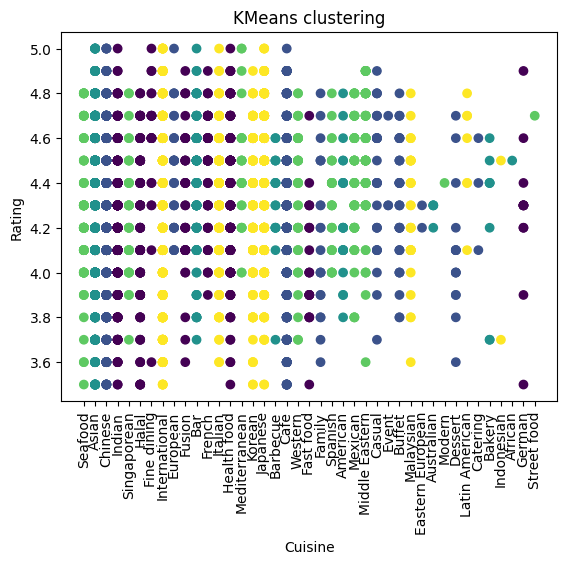

In [78]:
plt.scatter(restaurants_training_df.iloc[:,2], restaurants_training_df.iloc[:,3], c=km_restaurants.labels_)
plt.title('KMeans clustering')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.xticks(rotation=90);

In [79]:
restaurants_training_df['cluster'] = km_restaurants.labels_

In [80]:
cluster_groups = restaurants_training_df.groupby('cluster')['name'].apply(list).to_dict()

In [139]:
restaurants_training_df[restaurants_training_df['cluster'] == 4].sort_values(by='main_rating').head(30)

,name,reviews,cuisine,main_rating,review_photos,cuisine_encoded,reviews_scaled,main_rating_scaled,review_photos_scaled,cluster
3709,Bornga Singapore @ Suntec City,423,Korean,3.5,56,29,-0.209354,-2.470449,0.670693,4
2918,Men-Men Tei,36,Japanese,3.5,17,28,-0.545661,-2.470449,-1.044573,4
3641,Ichiban Bento (Tiong Bahru Plaza),26,Japanese,3.5,2,28,-0.554352,-2.470449,-1.704291,4
1405,Penang Savour - Traditional Penang Food,133,International,3.5,19,26,-0.461367,-2.470449,-0.956611,4
593,Sichuan Chef,27,International,3.5,8,26,-0.553483,-2.470449,-1.440404,4
2579,JIN Kimchi Express (Ghim Moh),65,Korean,3.5,8,29,-0.520460,-2.470449,-1.440404,4
4420,Hao Lai Wu Steamboat BBQ 好来屋火锅烧烤,333,International,3.5,56,26,-0.287565,-2.470449,0.670693,4
3379,Rabbit Brand Seafood Delicacies,76,International,3.5,28,26,-0.510901,-2.470449,-0.560780,4
3243,Penang Savour,139,International,3.6,38,26,-0.456153,-2.161633,-0.120968,4
144,Saizeriya - i12 Katong,37,Italian,3.6,63,27,-0.544792,-2.161633,0.978561,4


In [140]:
restaurants_training_df[restaurants_training_df['cluster'] == 4].shape

(992, 10)

In [142]:
restaurants_training_df[restaurants_training_df['cluster'] == 4]['cuisine'].value_counts()

International     326
Japanese          295
Italian           172
Korean            158
Malaysian          32
Latin American      7
Indonesian          2
Name: cuisine, dtype: int64

In [143]:
restaurants_training_df[restaurants_training_df['cluster'] == 1]['cuisine'].value_counts()

Chinese             532
Cafe                376
Buffet               35
European             31
Casual               30
Family               20
Dessert              15
Event                 3
Catering              3
Eastern European      2
Name: cuisine, dtype: int64

In [144]:
restaurants_training_df[restaurants_training_df['cluster'] == 2]['cuisine'].value_counts()

Asian         587
Bar           110
American       22
Barbecue       17
Bakery          8
Australian      4
African         1
Name: cuisine, dtype: int64

In [145]:
restaurants_training_df[restaurants_training_df['cluster'] == 3]['cuisine'].value_counts()

Seafood           89
Middle Eastern    73
Mexican           54
Western           40
Singaporean       34
Spanish           30
Mediterranean     28
Modern             1
Street food        1
Name: cuisine, dtype: int64

In [147]:
restaurants_training_df[restaurants_training_df['cluster'] == 0]['cuisine'].value_counts()

Indian         244
Health food    179
Halal          102
French          67
Fusion          40
Fine dining     24
Fast food       21
German          12
Name: cuisine, dtype: int64